
## Movie Data Set

### <b>UseCase:<b> To clean and analyze the movie_dataset using EDA to 
    - Gain Insights 
    - Determining relationships in Data
    - Checking of assumptions
    - Represent the analysis using plots
    

### The prime analysis include the below questions/RelationShips:<br>
1) What is the relation between Year and Movies Produced/Registered?<br>
2) Is there any relationship between duration and rating?<br>
3) Which Year produced most hit movies (liked by audience)<br>
4) Which Year generated maximum revenue?<br>
5) What is the relationship between Votes and Year?<br>
6) Which category of movies makes most of the good ratings?<br>
7) Which genre movies were most voted category?<br>
8) Which genre generated highest revenue?<br>
9) How director plays a role in revenues and votes?<br>
10) Who are the top performing actors?<br>


In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [2]:
movie_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")

In [3]:
#movie_data=pd.read_csv("C:/Users/brahmishreem/Desktop/1000_movies_data.csv")

In [4]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
movie_data.shape

(1000, 12)

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [7]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
movie_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### 1. Data Pre-Profiling

In [9]:
movieprofile = pandas_profiling.ProfileReport(movie_data)
movieprofile.to_file(outputfile="movie_before_preprocessing.html")

### 2.Data Preprocessing


In [10]:
movie_data.Metascore= movie_data.Metascore.fillna(movie_data['Metascore'].median()) #as Metascore data is -ve skewed

In [11]:
movie_data['Metascore'].median()

59.5

In [12]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


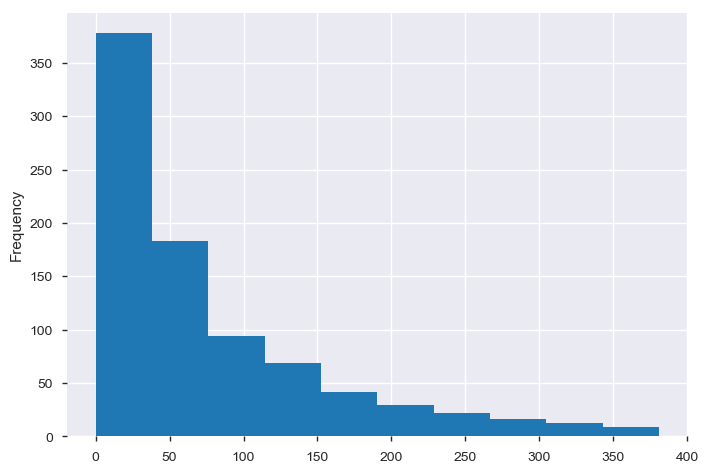

In [13]:
movie_data[movie_data['Revenue (Millions)']<400]['Revenue (Millions)'].plot.hist()

In [14]:
movie_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [15]:
movie_data.rename(columns={'Revenue (Millions)': 'RevenueInM'}, inplace=True)
movie_data.RevenueInM.fillna(movie_data.RevenueInM.median(), inplace=True)

### 1) What is the relation between Year and Movies Produced/Registered?

Text(0.5, 1.0, 'Count of movies produced year wise')

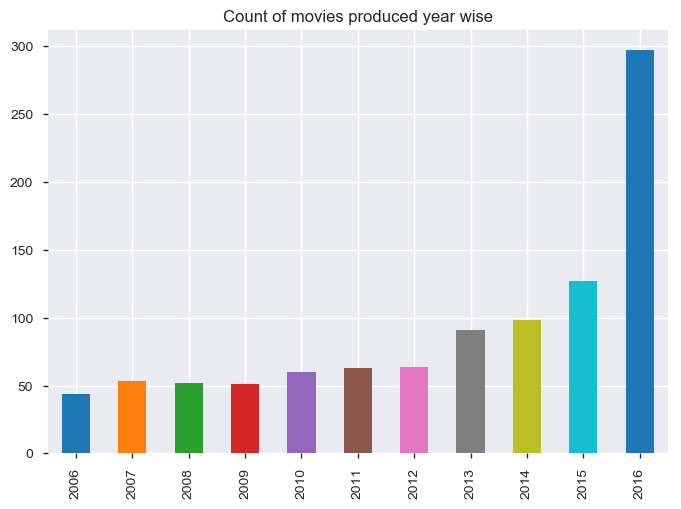

In [16]:
movie_data['Year'].value_counts().sort_index().plot.bar()
plt.title('Count of movies produced year wise')

#### The number of movies produced/registered has increased almost 5 folds from 2006 to 2016

### 2) Is there any relationship between duration and rating?

Text(0.5, 1.0, 'Relation between Rating and Duration of a movie using Scatter Plot')

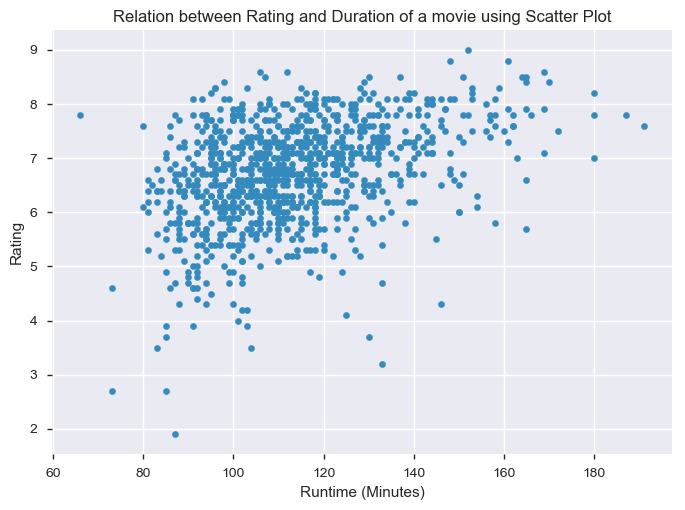

In [17]:
movie_data[['Runtime (Minutes)', 'Rating']].plot.scatter(x='Runtime (Minutes)', y='Rating')
plt.title('Relation between Rating and Duration of a movie using Scatter Plot')

Text(0.5, 1.0, 'Relation between Rating and Duration of a movie using HexPlot')

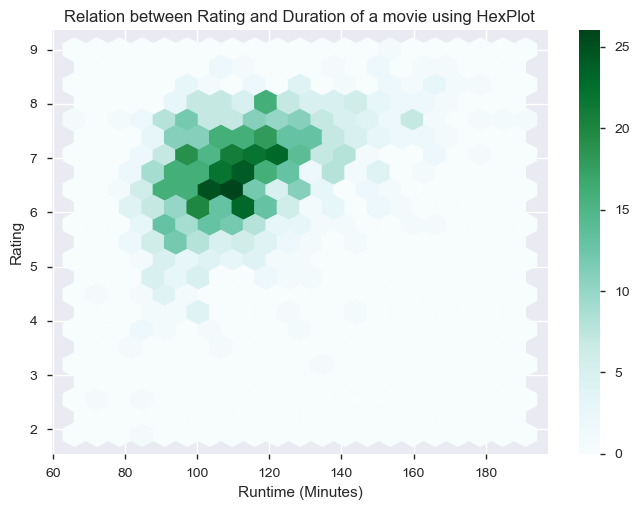

In [18]:
#As the data has too many overlapping points, choose to take HeatMap for better insight

movie_data.plot.hexbin(x='Runtime (Minutes)', y='Rating', gridsize=20)
plt.title('Relation between Rating and Duration of a movie using HexPlot')

#### Most average(6-7) rated movies are have a movie duration of 90-130 mins. The above graph doesnot give much detail insight on duration impacting the rating of a movie but we can conclude most movie duration range between 90-135 minutes.

In [19]:
#Function for categorizing numerals to categorical class
def categorizeRating(x):
    if x >= 8.5:
        return "Excellent"
    elif x >=7  and x <8.5:
        return "Good"
    elif x >=6.0  and x <7:
        return "Average"
    elif x >=4.5  and x <6.0:
        return "Poor"
    else:
        return "Worst"

In [20]:
movie_data['MetacriticRating']= (movie_data['Metascore']/10)            #Standardise the metascore data with Rating

In [21]:
movie_data['RatingClass'] = movie_data['Rating'].apply(categorizeRating)         #Classifying Ratings into categories
movie_data['MetaScoreClass'] = movie_data['MetacriticRating'].apply(categorizeRating)         #Classifying MetacriticRating into categories

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Rating distribution againt duration')

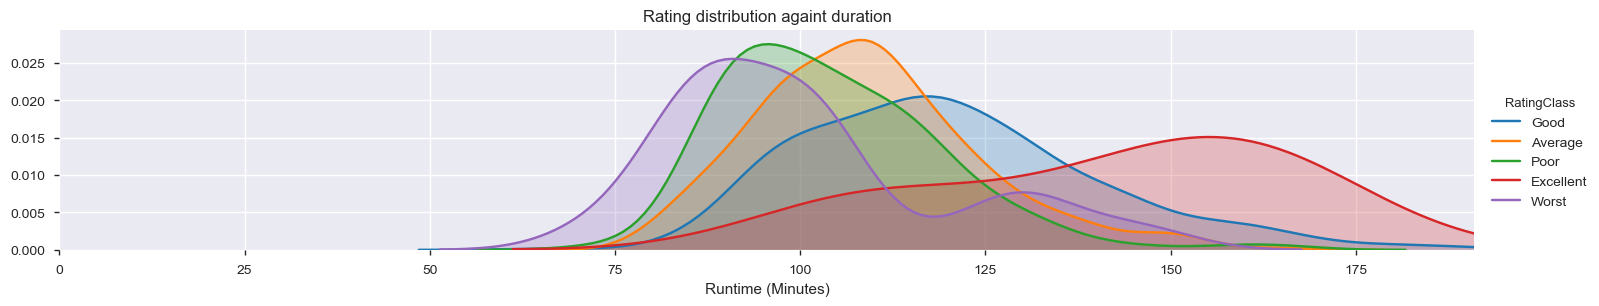

In [22]:
as_fig = sns.FacetGrid(movie_data,hue='RatingClass',aspect=5)
as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)
oldest = movie_data['Runtime (Minutes)'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Rating distribution againt duration')

#### The excellent rated movies has high variance with duration(graph is platykurtic) while worst performing movies mostly ranged between 85-105 mins.

Text(0.5, 1.0, 'MetaScoreClass distribution againt duration')

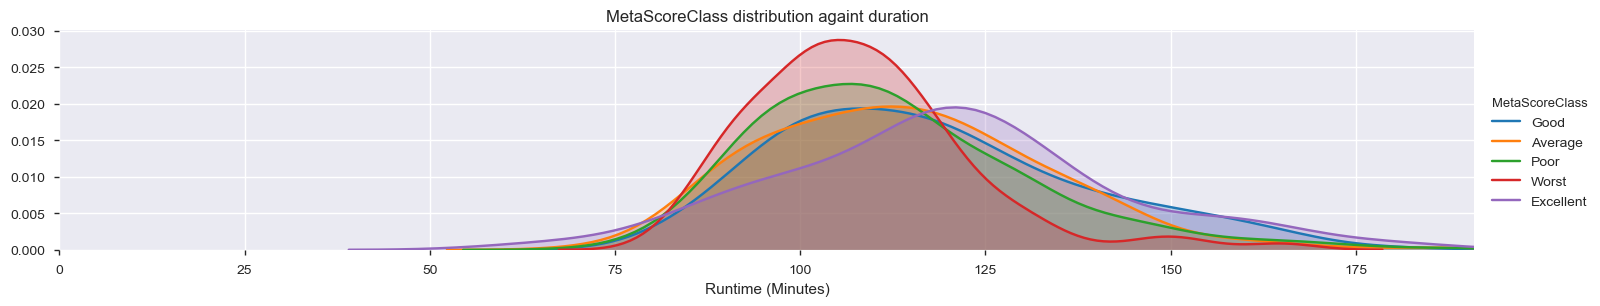

In [23]:
as_fig = sns.FacetGrid(movie_data,hue='MetaScoreClass',aspect=5)
as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)
oldest = movie_data['Runtime (Minutes)'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('MetaScoreClass distribution againt duration')

#### The metacritic ratings against duration is almost same for each category ranged between 85-105 mins with the excellent mmovies having slightly greater duration 

### We cannot much conclude if duration has any role to play with the sucess(Ratings) of the movie

<p/>

Text(0.5, 1.0, 'Duration and Year wise plot')

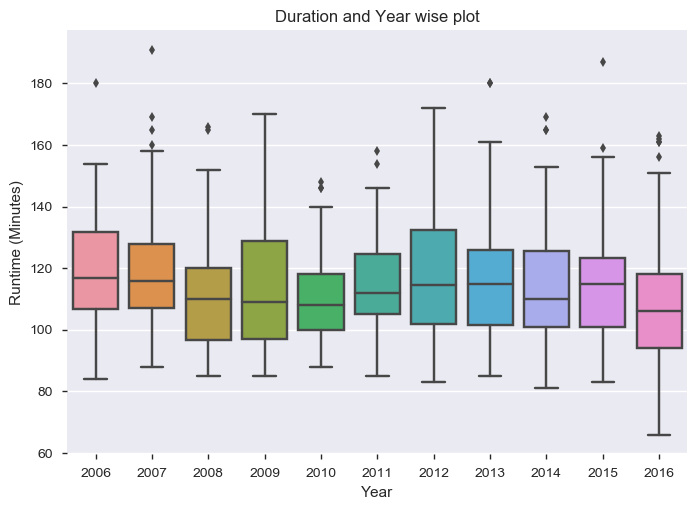

In [24]:
sns.boxplot('Year','Runtime (Minutes)',data=movie_data)
plt.title("Duration and Year wise plot")

### The average duration of movies each year ranges between 100-120 minutes.

<p/>

In [25]:
movie_data['RatingClass'] = movie_data['Rating'].apply(categorizeRating)                      #Classifying Ratings into categories

In [26]:
movie_data['MetaScoreClass'] = movie_data['MetacriticRating'].apply(categorizeRating)         #Classifying Ratings into categories

In [27]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,RevenueInM,Metascore,MetacriticRating,RatingClass,MetaScoreClass
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,7.6,Good,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,6.5,Good,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,6.2,Good,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,5.9,Good,Poor
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,4.0,Average,Worst


### 3) Which Year produced most hit movies (liked by audience)

In [28]:
good_movies = movie_data[(movie_data['RatingClass']=='Good') | (movie_data['RatingClass']=='Excellent'  )]    # Filter out the high rated movies

In [29]:
excellent_movies = movie_data[(movie_data['RatingClass']=='Excellent'  )] 

Text(0.5, 1.0, 'Count plot for year wise of movies produced')

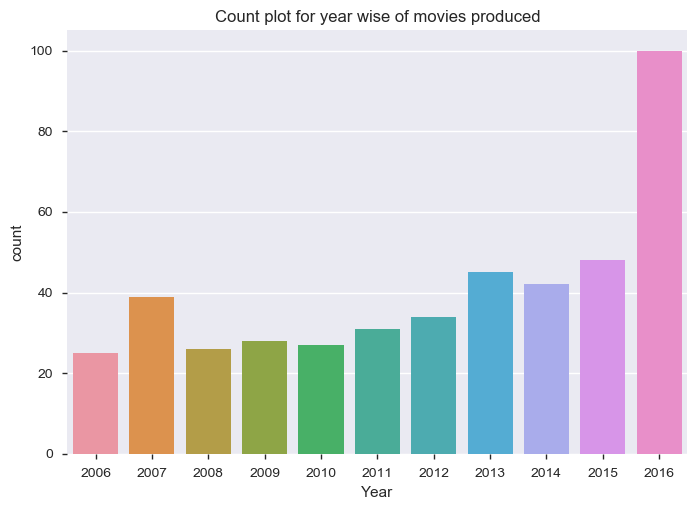

In [30]:
sns.countplot('Year',data=good_movies)
plt.title('Count plot for year wise of movies produced')

As per graph, 2016 produced most number of hit movies. However, the data is not standadized as the no of movie produced each year varies and cannot be concluded

In [31]:
movie_data.groupby(['Year'])['Year'].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

Text(0.5, 1.0, 'Plot shows the hit(rating above 7) produced each year')

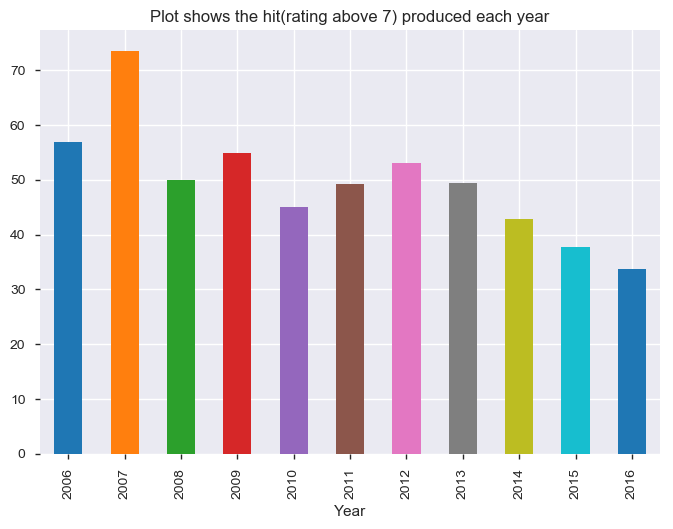

In [32]:
((good_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.bar()
plt.title("Plot shows the hit(rating above 7) produced each year")

#### 1) Year 2007 produced most of the hit movies while 2006 produced maximum number of high rated movies
#### 2) Although 2016 produced a highest quantity of movies, quality wise it scored the lowest.

Text(0.5, 1.0, 'Superhit movies(rating above 8.5) produced each year')

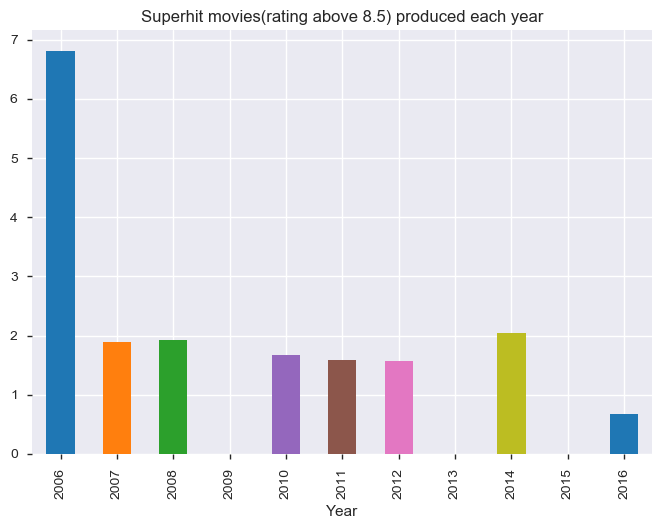

In [33]:
((excellent_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.bar()
plt.title("Superhit movies(rating above 8.5) produced each year")

Text(0.5, 1.0, 'Year wise contribution of only super hit movies')

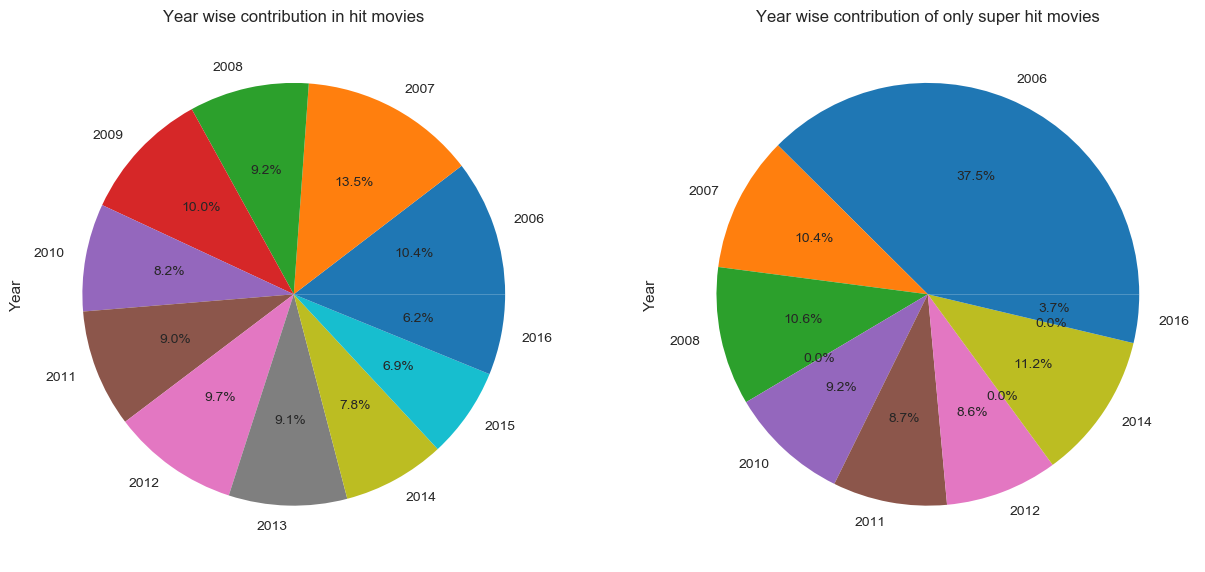

In [34]:
f,ax = plt.subplots(1,2,figsize=(15,7))

((good_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.pie(autopct='%1.1f%%', ax=ax[0])
((excellent_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[0].set_title('Year wise contribution in hit movies')
ax[1].set_title('Year wise contribution of only super hit movies')

#### <b>2007</b>, produced large number of hit movies, followed by <b>2006, 2009</b>
If we consider only the super hits <b>2006,  was the golden year in the film industry</b> and alone constituted <b>37.5</b> share of excellent rated movies<br>
2009, 2013, 2015 had no superhit movies

<p>

### 4) Which Year generated maximum revenue?


In [35]:
movie_data.groupby("Year").RevenueInM.sum().reset_index()

,Year,RevenueInM
0,2006,3720.430
1,2007,4498.170
2,2008,5101.205
3,2009,5484.200
4,2010,6133.605
5,2011,5479.945
6,2012,6910.290
7,2013,7810.675
8,2014,8189.340
9,2015,9525.910


In [36]:
movie_data.groupby("Year").RevenueInM.sum()/movie_data.groupby(['Year'])['Year'].count()

Year
2006     84.555227
2007     84.871132
2008     98.100096
2009    107.533333
2010    102.226750
2011     86.983254
2012    107.973281
2013     85.831593
2014     83.564694
2015     75.007165
2016     52.613704
dtype: float64

Text(0.5, 1.0, 'Year wise Revenue generated')

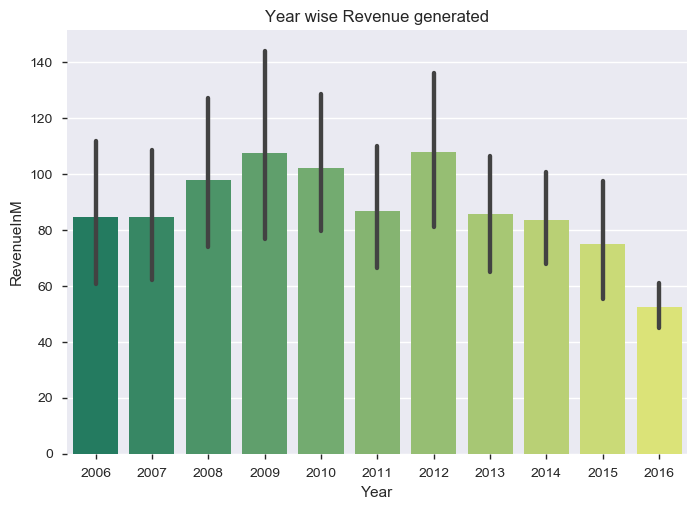

In [37]:
sns.barplot(x="Year", y="RevenueInM", data=movie_data, palette="summer")
plt.title("Year wise Revenue generated")

 1) Year 2016 has generated a total revenue of <b>15626.270M</b><p>
 2) However considering the number of released per year, <b>2009</b> and <b>2012</b> has the highest revenue while 2016 had least revenue in comparision</p> 
 3) In 2016, as the number of hit and superhit movies released is the lowest. It has directly impacted the revenue.

In [38]:
movie_data.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,RevenueInM,Metascore,MetacriticRating
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.259607,-0.184922,-0.184922
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.075970,-0.075970
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.272955,0.202079,0.202079
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604522,0.604522
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.638758,0.317268,0.317268
RevenueInM,-0.259607,-0.146589,0.272955,0.218448,0.638758,1.000000,0.141381,0.141381
Metascore,-0.184922,-0.075970,0.202079,0.604522,0.317268,0.141381,1.000000,1.000000
MetacriticRating,-0.184922,-0.075970,0.202079,0.604522,0.317268,0.141381,1.000000,1.000000


<p>

### 5) What is the relationship between Votes and Year?

Text(0.5, 1.0, 'Relationship between Votes and Year')

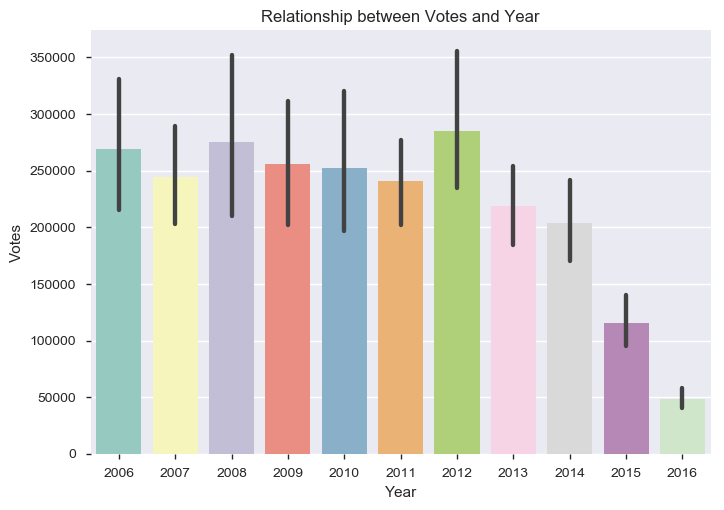

In [39]:
sns.barplot(x="Year", y="Votes", data=movie_data, palette="Set3")
plt.title("Relationship between Votes and Year")

##### 1) From the plot, 2012 has the highest number of votes.
##### 2) After 2012, the number of votes have been declining. 
#### Could it be that the other entertainment sources(Netflix/Amazon Originals, Youtube webseries/channels etc) have gained more popularty and have better content in recent years. Therefore, people focus is distributed leading to  low votes and revenue


In [40]:
movie_data.groupby("Year").Votes.sum()/movie_data.groupby(['Year'])['Year'].count()

Year
2006    269289.954545
2007    244331.037736
2008    275505.384615
2009    255780.647059
2010    252782.316667
2011    240790.301587
2012    285226.093750
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
dtype: float64

In [41]:
### How UserRating, Critic Rating impact the votes?

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


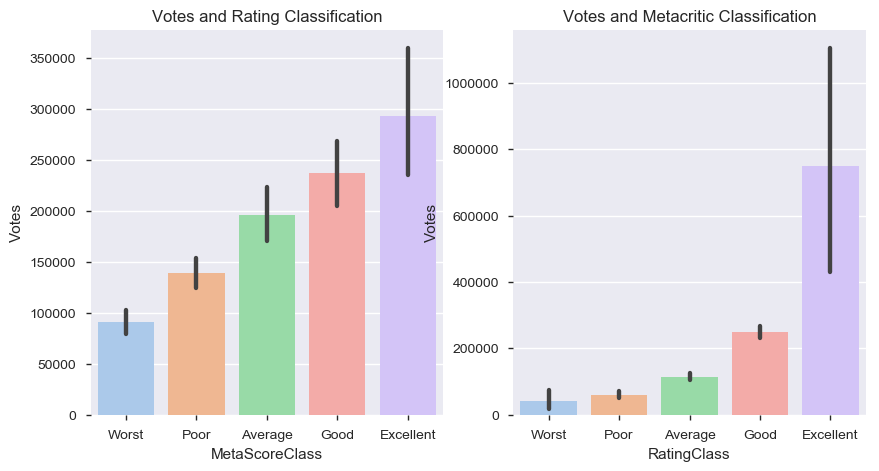

In [42]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
a=sns.barplot(x="MetaScoreClass", y="Votes", data=movie_data, palette="pastel",  ax=ax[0], order=["Worst", "Poor","Average","Good", "Excellent"])
b=sns.barplot(x="RatingClass", y="Votes", data=movie_data, palette="pastel",  ax=ax[1], order=["Worst", "Poor","Average","Good", "Excellent"])
a.title.set_text('Votes and Rating Classification')
b.title.set_text('Votes and Metacritic Classification')
fig.show()


#### The high rated movies both critically acclaimed and user ratings states that <b>More the votes, merrier the ratings<b/>

<p/>

## 6) Which genre of movies are the most commonly produced?

##### Number of movies produced in each genre

In [43]:
#movie_data.groupby("PrimeGenre").PrimeGenre.count()
movies1 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[0])
movies2 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[1])
movies3 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[2])

#remove leading white spaces
movies2['PrimeGenre1']=movies2['PrimeGenre1'].str.lstrip()
movies3['PrimeGenre1']=movies3['PrimeGenre1'].str.lstrip()

movies=pd.concat([movies1,movies2,movies3], axis=0)
movies.groupby("PrimeGenre1").PrimeGenre1.count().sort_values()

PrimeGenre1
Musical        5
Western        7
War           13
Music         16
Sport         18
History       29
Animation     49
Family        51
Biography     81
Fantasy      101
Mystery      106
Horror       119
Sci-Fi       120
Romance      141
Crime        150
Thriller     195
Adventure    259
Comedy       279
Action       303
Drama        513
Name: PrimeGenre1, dtype: int64

In [44]:
#del movies

Text(0.5, 1.0, 'Movies produced in each genre')

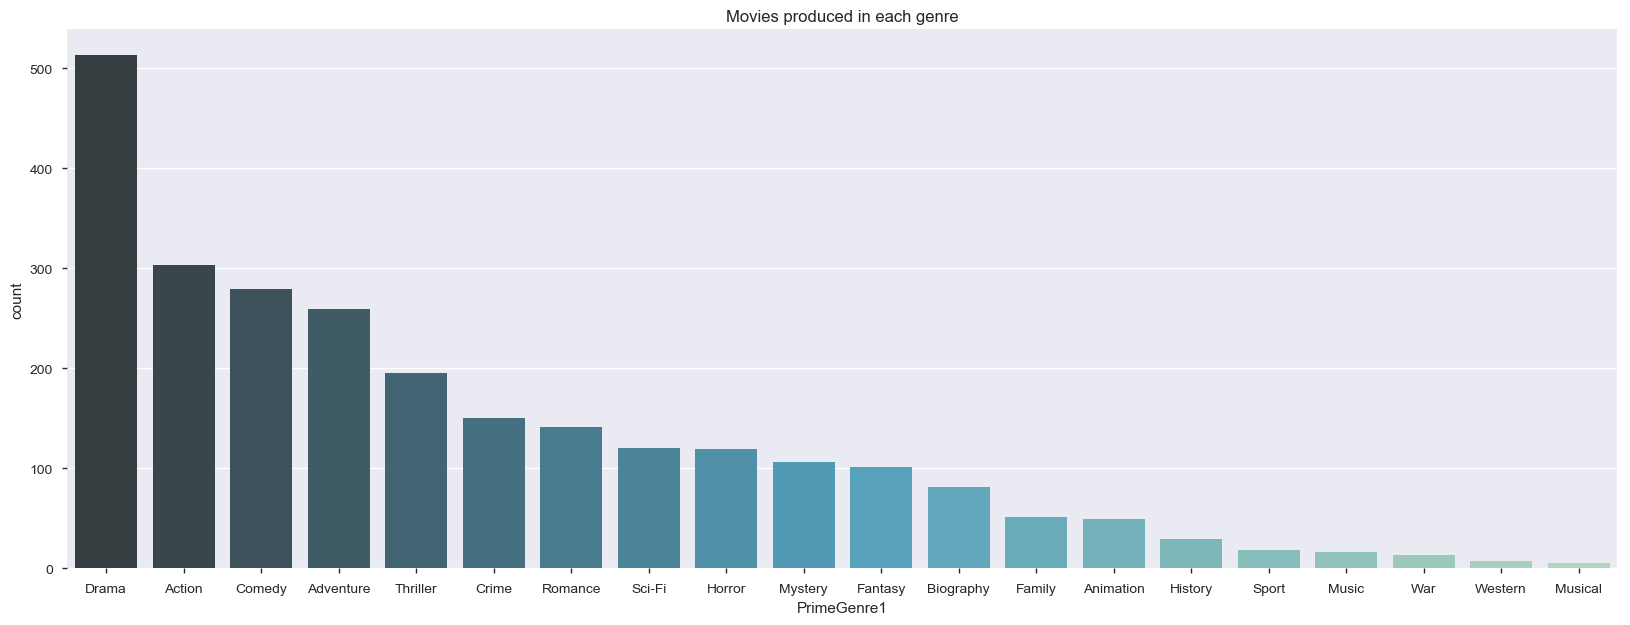

In [45]:
fig, ax =plt.subplots( figsize=(20,7))
#sns.countplot('PrimeGenre',data=movie_data, palette="GnBu_d", order=movie_data['PrimeGenre'].value_counts().index)
sns.countplot('PrimeGenre1',data=movies, palette="GnBu_d", order=movies['PrimeGenre1'].value_counts().index)
plt.title("Movies produced in each genre")

##### 1) <b>Drama</b> Genre is the clear winner with total of <b>513</b> movies followed by Action with 303 categoried under it </br> 2) Western and Musical genre were <b>least</b> produced.
The dominance of drama as a genre is perhaps not surprising when we consider the following:
* Drama is the cheapest genre to produce as movies don’t necessarily require special sets, costumes, locations, props, special/visual effects, etc.
* Drama has the broadest definition of all genres – everything that happens anywhere ever is a drama. Conversely, other genres have a higher bar for classification, such as the need for high-octane events for a movie to be classed as Action, scary events to be Horror, funny elements to be a Comedy, etc.

<p>
    <p>

### 7) Which genre movies received highest positive reviews?

In [46]:
#df.nlargest(10, ['Weight']) 
(movies.groupby("PrimeGenre1").Metascore.sum()).sort_values()


PrimeGenre1
Musical        300.0
Western        380.5
War            833.5
Music          971.0
Sport         1104.0
History       2043.5
Family        2840.5
Animation     3434.5
Biography     5490.0
Fantasy       5582.5
Mystery       6284.5
Horror        6776.5
Sci-Fi        6995.0
Romance       7860.0
Crime         8683.5
Thriller     11452.0
Adventure    14955.0
Comedy       16092.5
Action       16390.0
Drama        32418.5
Name: Metascore, dtype: float64

Text(0.5, 1.0, 'Count plot for Ratings received to each Genre')

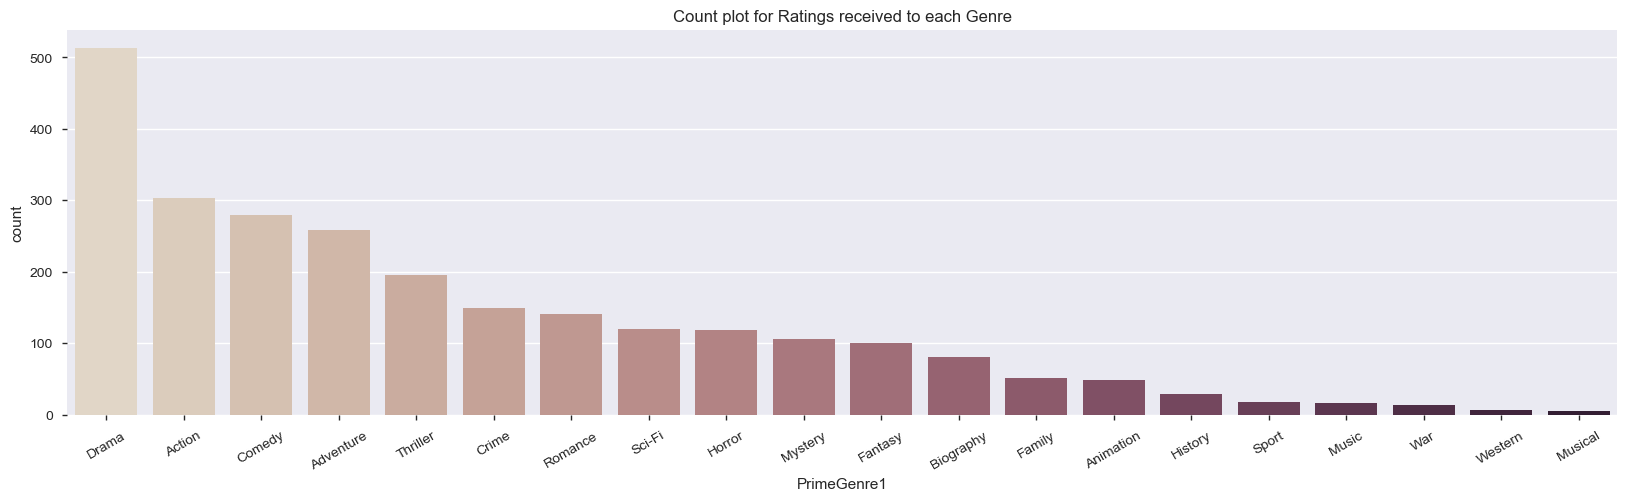

In [47]:
fig, ax =plt.subplots( figsize=(20,5))
#genRating=((movies.groupby("PrimeGenre1").Metascore.sum()).sort_values(ascending=False)).plot.bar()
genRating=sns.countplot(x="PrimeGenre1", data=movies, palette="ch:.25",order = movies['PrimeGenre1'].value_counts().index)
for item in genRating.get_xticklabels():
    item.set_rotation(30)
plt.title('Count plot for Ratings received to each Genre')

#### Drama,Action, Comedy, Adventure are the with top genres with highest ratings.

<p>

### 8) Which genre generated highest revenue?

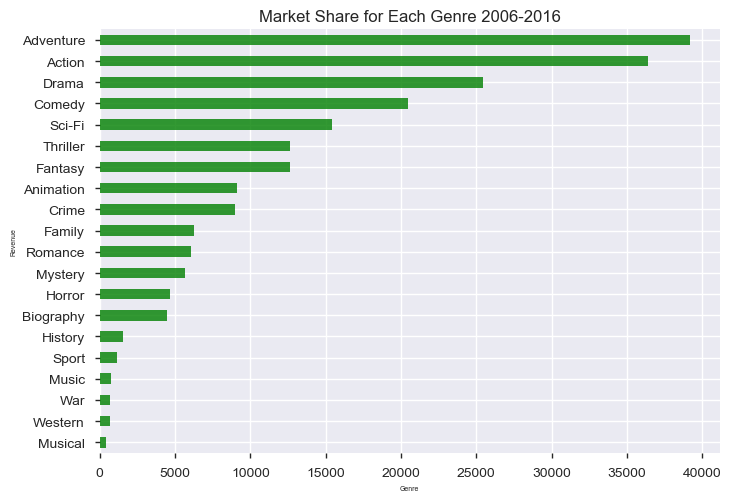

In [48]:
movies.groupby("PrimeGenre1").RevenueInM.sum().sort_values().plot.barh(color=(0.0, 0.5, 0.0, 0.8))
plt.xlabel('Genre', fontsize=5)
plt.ylabel('Revenue', fontsize=5)
plt.title('Market Share for Each Genre 2006-2016')
plt.show()

#### Adventure, Action,Drama & Comedy were the genre generating highest revenues.

<p>

### 9) How director plays a role in revenues and votes?

As there is a high cardinality in the director column, we are considering the directors who have directed atleast 4 movies 

Capture top directors

In [49]:
#Let us filter some of the directors who have produced hit movies and have done atleast 4 Movies 
good_dir=good_movies.groupby("Director").filter(lambda x: len(x) > 3)
#good_dir.head()

In [50]:
good_dir.groupby(['Director'])['Director'].count()

Director
Christopher Nolan    5
Clint Eastwood       4
Danny Boyle          5
David Fincher        5
David Yates          5
Denis Villeneuve     4
Guy Ritchie          4
J.J. Abrams          4
Jon Favreau          4
Martin Scorsese      5
Matthew Vaughn       4
Quentin Tarantino    4
Ridley Scott         4
Name: Director, dtype: int64

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


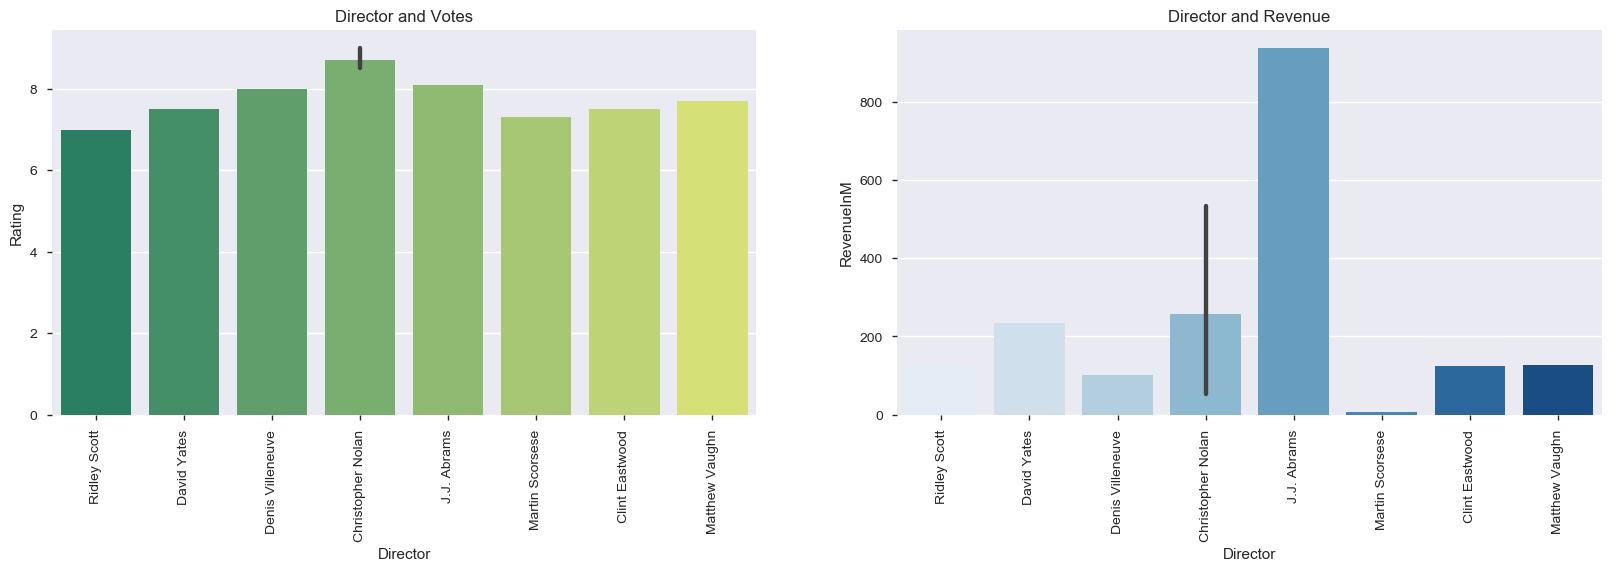

In [51]:
fig, ax =plt.subplots(1,2, figsize=(20,5))
sDV=sns.barplot(x="Director", y="Rating", data=good_dir.iloc[0:10,:], palette="summer",  ax=ax[0])
sDR=sns.barplot(x="Director", y="RevenueInM", data=good_dir.iloc[0:10,:], palette="Blues",  ax=ax[1])
sDV.title.set_text('Director and Votes')
sDR.title.set_text('Director and Revenue')
for item in sDV.get_xticklabels():
    item.set_rotation(90)
for item in sDR.get_xticklabels():
    item.set_rotation(90)
fig.show()

#### Data suggests that Nolan Movies are the highest voted while J.J Abrams movies get more revenues

In [52]:
result=good_dir.groupby(["Director"])['Rating'].aggregate(np.median).reset_index().sort_values('Rating', ascending=False)
result.iloc[0:4,:]  
#result

,Director,Rating
0,Christopher Nolan,8.60
9,Martin Scorsese,8.10
5,Denis Villeneuve,8.05
11,Quentin Tarantino,8.05


In [53]:
#del good_dir

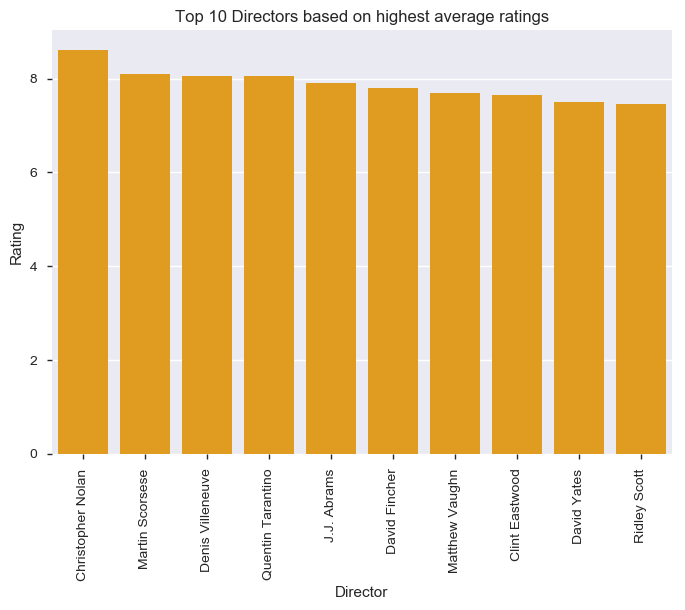

In [54]:
sDR=sns.barplot(x="Director", y="Rating", data=result.iloc[0:10,:] , color="Orange")
plt.title("Top 10 Directors based on highest average ratings")
for item in sDR.get_xticklabels():
    item.set_rotation(90)

Christopher Nolan tops the score board with highest number top rated movies

In [55]:
result=good_dir.groupby(["Director"])['Metascore'].aggregate(np.mean).reset_index().sort_values('Metascore', ascending=False)
result.iloc[0:4,:] 

,Director,Metascore
5,Denis Villeneuve,79.25
3,David Fincher,78.60
9,Martin Scorsese,77.00
7,J.J. Abrams,76.75


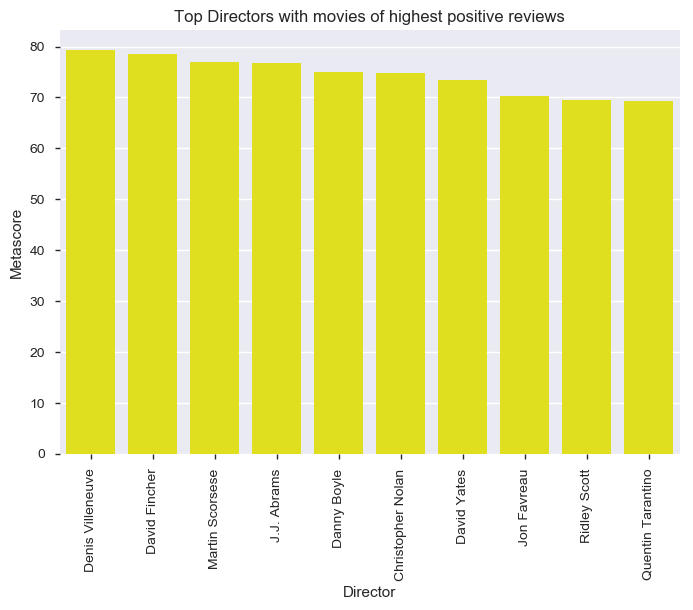

In [56]:
sDR=sns.barplot(x="Director", y="Metascore", data=result.iloc[0:10,:] , color="Yellow")
plt.title("Top Directors with movies of highest positive reviews")
for item in sDR.get_xticklabels():
    item.set_rotation(90)

In [71]:
result=good_dir.groupby(["Director"])['RevenueInM'].aggregate(np.median).reset_index().sort_values('Rating', ascending=False)
result.iloc[0:4,:]  

KeyError: 'Rating'

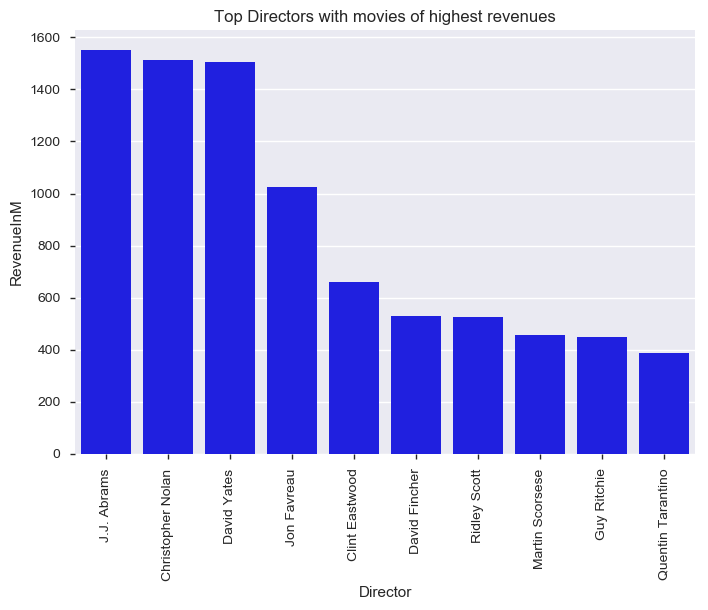

In [58]:
#sDR=sns.barplot(x="Director", y="RevenueInM", data=result.iloc[0:10,:] , color="Blue")
sDR=sns.barplot(x="Director", y="RevenueInM", data=result.iloc[0:10,:] , color="Blue")
plt.title("Top Directors with movies of highest revenues")
for item in sDR.get_xticklabels():
    item.set_rotation(90)

<p/>

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


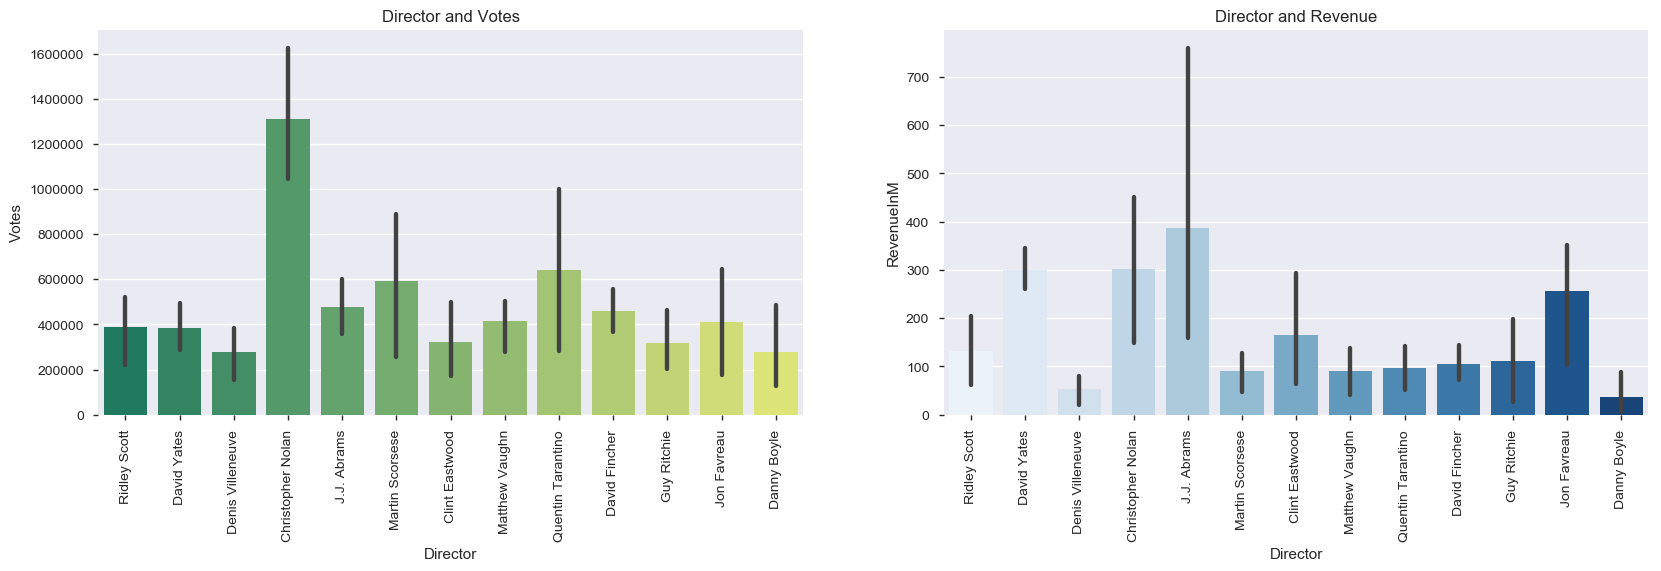

In [59]:
fig, ax =plt.subplots(1,2, figsize=(20,5))
sDV=sns.barplot(x="Director", y="Votes", data=good_dir, palette="summer",  ax=ax[0])
sDR=sns.barplot(x="Director", y="RevenueInM", data=good_dir, palette="Blues",  ax=ax[1])
sDV.title.set_text('Director and Votes')
sDR.title.set_text('Director and Revenue')
for item in sDV.get_xticklabels():
    item.set_rotation(90)
for item in sDR.get_xticklabels():
    item.set_rotation(90)
fig.show()

### 10) Who are the top performing actors?

In [60]:
#dist1= good_movies['Actors'].str.split(',').str[0]
dist1 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[0])
dist2 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[1])
dist3 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[2])
dist4 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[3])
dist5 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[4])


In [61]:
dist1.count()

Rank                 445
Title                445
Genre                445
Description          445
Director             445
Actors               445
Year                 445
Runtime (Minutes)    445
Rating               445
Votes                445
RevenueInM           445
Metascore            445
MetacriticRating     445
RatingClass          445
MetaScoreClass       445
Actor1               445
dtype: int64

In [62]:
#remove leading white spaces
dist2['Actor1']=dist2['Actor1'].str.lstrip()
dist3['Actor1']=dist3['Actor1'].str.lstrip()

In [63]:
#concat all 3 datasets
actorPreProcess=pd.concat([dist1, dist2,dist3 ], axis=0)   

In [64]:
topActors_MovieData=actorPreProcess.groupby('Actor1').filter(lambda x: len(x) > 4)         #filter dataset wth actors having done more  than 3 movies

In [65]:
topactors=topActors_MovieData.groupby('Actor1')['Actor1'].count().sort_values(ascending=False)
topactors[topactors>6]

Actor1
Robert Downey Jr.     12
Tom Hardy             10
Leonardo DiCaprio     10
Brad Pitt              9
Ryan Gosling           8
Jake Gyllenhaal        8
Michael Fassbender     8
Amy Adams              8
Christian Bale         8
Scarlett Johansson     7
Jonah Hill             7
Hugh Jackman           7
Bradley Cooper         7
Jennifer Lawrence      7
Name: Actor1, dtype: int64

Text(0.5, 1.0, 'Top rated actors as per hit movies')

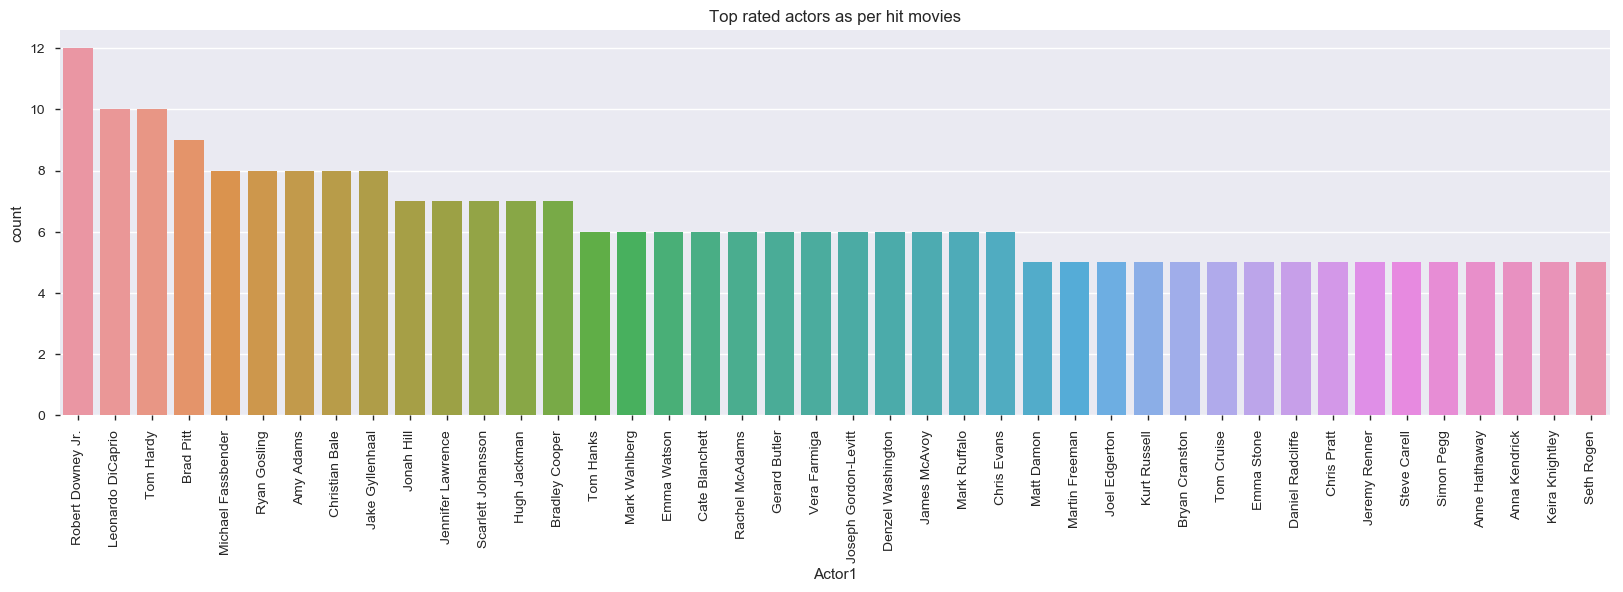

In [66]:
fig, ax =plt.subplots( figsize=(20,5))
actors=sns.countplot('Actor1',data=topActors_MovieData, order = topActors_MovieData['Actor1'].value_counts().index)
for item in actors.get_xticklabels():
    item.set_rotation(90)
plt.title("Top rated actors as per hit movies")

#### List of top actors with maximum hit movies<br/>
Robert Downey Jr.       <b>12</b> hit movies <br/>
Tom Hardy & Leonardo DiCaprio <b>10</b> hit movies <br/>
Brad Pitt               <b>9</b> hit movies <br/>
Ryan Gosling, Jake Gyllenhaal, Michael Fassbender, Amy Adams, Christian Bale   <b>8</b> hit movies <br/>
<p>
    <b>Amy Adams, Scarlet Johansen & Jenifer lawerence</b> were some of the top female actress having starred in most hit movies

In [67]:
result=topActors_MovieData.groupby(["Actor1"])['RevenueInM'].aggregate(np.median).reset_index().sort_values('RevenueInM', ascending=False)


Text(0.5, 1.0, 'Top rated actors as per hit movies')

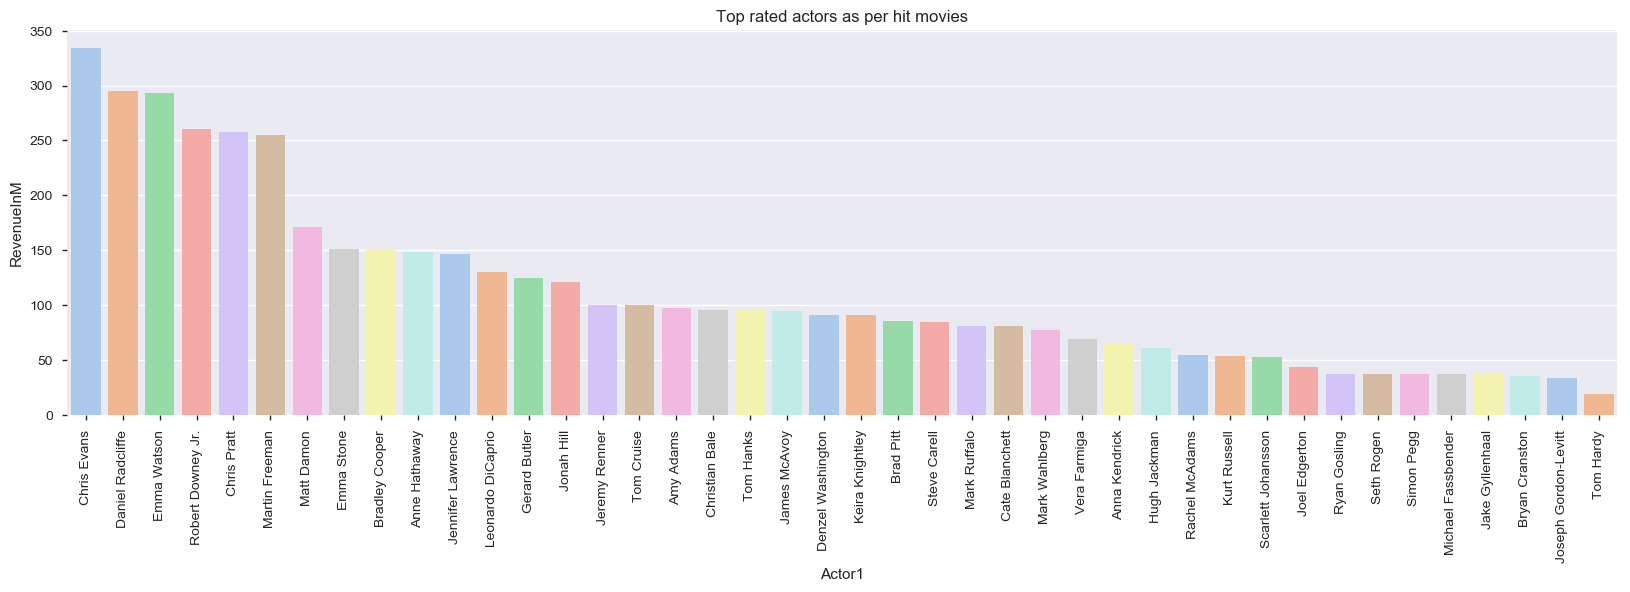

In [68]:
fig, ax =plt.subplots( figsize=(20,5))
rev=sns.barplot(x="Actor1", y="RevenueInM", data=result, palette="pastel",order = result["Actor1"])
for item in rev.get_xticklabels():
    item.set_rotation(90)
plt.title("Top rated actors as per hit movies")

##### Top 5 Actors with films with highest revenue
Chris Evans	333.915<br>
Daniel Radcliffe	294.980<br>
Emma Watson	293.490<br>
Robert Downey Jr.	260.540<br>
Chris Pratt	257.760<br>
Martin Freeman	255.110<br>

In [69]:
m1=movie_data[movie_data['Actors'].str.contains('Chris Evans')]
m1.RevenueInM.sum()

1949.0099999999998